In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("D:\\overall_practice_Files\\Csv_files\\bike_rentals.csv")

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df.shape

(10886, 12)

In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

# df.describe()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
df.loc[:,['temp','atemp']]

,temp,atemp
0,9.84,14.395
1,9.02,13.635
2,9.02,13.635
3,9.84,14.395
4,9.84,14.395
...,...,...
10881,15.58,19.695
10882,14.76,17.425
10883,13.94,15.910
10884,13.94,17.425


In [17]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
df.isnull().sum().sum()

0

In [21]:
df.count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

In [23]:
df.drop(['datetime'], axis=1, inplace=True)

Text(0.5, 1.0, 'Histogram count')

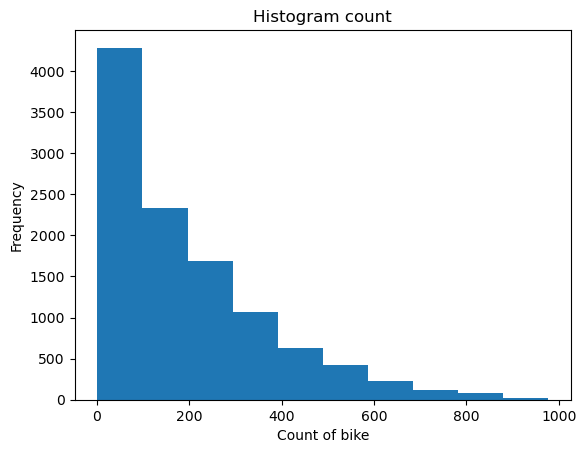

In [27]:
plt.hist(df['count'])
plt.xlabel('Count of bike')
plt.ylabel('Frequency')
plt.title('Histogram count')

In [29]:
X = df.iloc[:,:-1] # want all columns expect last target column
y =  df.iloc[:,-1] # only last column

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 99)

In [35]:
X_train.shape

(8164, 10)

In [37]:
y_train.shape

(8164,)

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
reg = DecisionTreeRegressor(criterion = "squared_error",
                            max_depth = 10, 
                            min_samples_split = 10, 
                            random_state = 5 )

In [43]:
reg

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=5)

In [45]:
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=5)

In [47]:
y_pred = reg.predict(X_test)

In [49]:
y_pred

array([206.15384615, 249.        , 237.4137931 , ...,  23.28571429,
        99.21052632, 459.27272727])

In [51]:
from sklearn.metrics import mean_squared_error

In [53]:
mean_squared_error(y_test,y_pred)

40.275169711857124

In [55]:
np.sqrt(mean_squared_error(y_test,y_pred))

6.346272111393989

In [67]:
from sklearn.model_selection import cross_val_score

In [71]:
cross_val_score(reg,X_train, y_train, cv =10)

array([0.99855151, 0.99863331, 0.9983964 , 0.99819905, 0.99842696,
       0.9986549 , 0.99876644, 0.99851822, 0.9987442 , 0.99812538])

In [77]:
df[['season','holiday']].corr()

,season,holiday
season,1.000000,0.029368
holiday,0.029368,1.000000
